# 4.1 선형 회귀

## 4.1.1 정규방정식

In [3]:
import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

(0.0, 2.0)

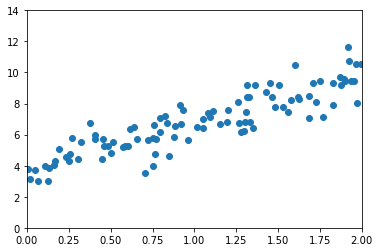

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylim(0,14)
plt.xlim(0,2)

In [5]:
X_b=np.c_[np.ones((100,1)), X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.73293498],
       [2.99497022]])

In [7]:
X_new=np.array([[0], [2]])
X_new_b=np.c_[np.ones((2,1)), X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[3.73293498],
       [9.72287542]])

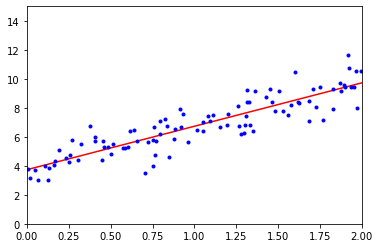

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.73293498]), array([[2.99497022]]))

In [10]:
lin_reg.predict(X_new)

array([[3.73293498],
       [9.72287542]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.73293498],
       [2.99497022]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.73293498],
       [2.99497022]])

# 4.2 경사 하강법

## 4.2.1 배치 경사 하강법

In [13]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

In [14]:
theta

array([[0.83726401],
       [0.42750566]])

In [15]:
for iteration in range(n_iterations):
    gradients=2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta=theta-eta*gradients

In [16]:
theta

array([[3.73293498],
       [2.99497022]])

## 4.2.2 확률적 경사 하강법

In [17]:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta) - yi)
        eta=learning_schedule(epoch*m + i)
        theat=theta - eta * gradients

In [18]:
theta

array([[-1.53567445],
       [ 0.82195346]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.71386746]), array([3.0112877]))

## 4.2.3 미니 배치 경사 하강법

# 4.3 다항 회귀

In [21]:
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

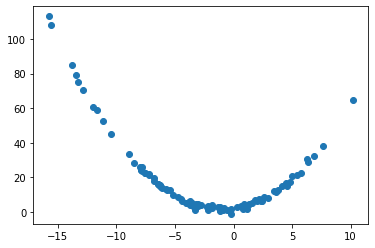

In [22]:
plt.scatter(X,y)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)

In [24]:
X[0]

array([5.72187782])

In [25]:
X_poly[0]

array([ 5.72187782, 32.73988579])

In [26]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.84571523]), array([[1.01024654, 0.50160238]]))

# 4.4 학습 곡선

##### 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할것
##### 고차 다항 회귀는 심각하게 훈련 데이터에 과대적합 되어있음, 반면 선형 모델은 과소적합

In [27]:
# 학습 곡선
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors=[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label='training set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='validation set')
    plt.legend()

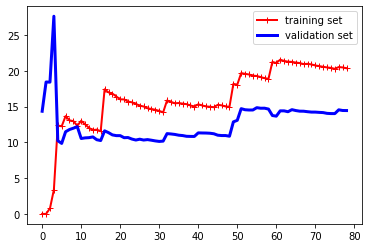

In [28]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

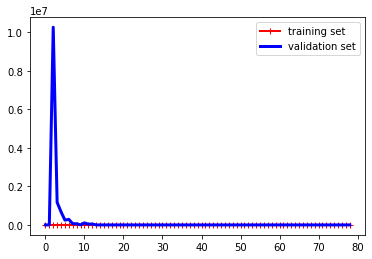

In [29]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# 4.5 규제가 있는 선형 모델

#### 과대적합을 감소시키는 좋은 방법 : 모델 규제 -> 자유도를 줄이면 데이터에 과대적합되기 더 어려워짐
#### 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것

## 4.5.1 릿지 회귀

In [30]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.50007268]])

In [31]:
#확률 경사 하강법
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

#penalty 매개변수는 사용할 규제를 지정
#'L2' 는 SGD가 비용 함수에 가중치 벡터의 l2노름 제곱을 2로 나눈 규제항을 추가하게 만든다. => 릿지 회귀와 같음

array([7.88624056])

## 4.5.2 라쏘 회귀

In [32]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

#Lasso 대신 SGDRegressor(penaly='l1') 사용가능

array([8.51087997])

## 4.5.3 엘라스틱넷

##### 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평험한 선형 회귀는 피해하 한다.
##### 릿지가 기본이 되지만 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다.
##### 불필요한 특성의 가중치를 0으로 만들어 준다. 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연간되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호

In [33]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([8.51929725])

In [32]:
#조기 종료의 기본적인 구현 코드

from copy import deepcopy
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler=Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled=poly_scaler.fit_transform(X_train)
X_val_poly_scaled=poly_scaler.transform(X_val)

sgd_reg=SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error=float('inf')
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=deepcopy(sgd_reg)

NameError: name 'X_train' is not defined

# 4.6 로지스틱 회귀

## 4.6.3 결정 경계

In [34]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [36]:
X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int32) # 1 Iris-Virginica 면 1, 그렇지 않으면 0

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

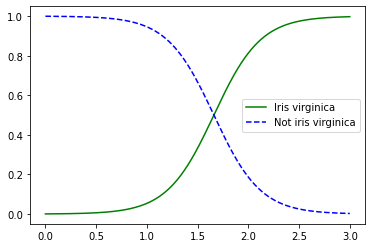

In [40]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not iris virginica')
plt.legend()

In [39]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

In [41]:
X=iris['data'][:,(2,3)]
y=iris['target']

softmax_reg=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [42]:
softmax_reg.predict([[5,2]])

array([2])

In [43]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])